In [1]:
# ==========================================
# 🍰 Creative Pie Chart Visuals
# Using Python, NumPy, Pandas, Matplotlib
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset
np.random.seed(42)
data = {
    "Category": ["A", "B", "C", "D", "E"],
    "Values1": np.random.randint(10, 100, 5),
    "Values2": np.random.randint(20, 120, 5)
}
df = pd.DataFrame(data)
df

,Category,Values1,Values2
0,A,61,102
1,B,24,106
2,C,81,94
3,D,70,94
4,E,30,107


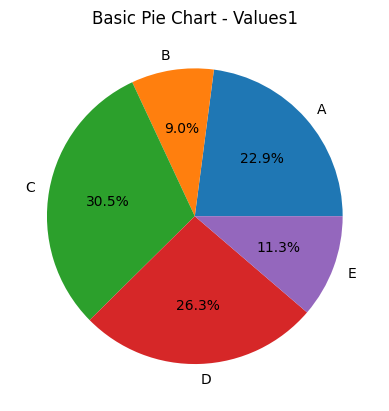

In [2]:
plt.figure()
plt.pie(df["Values1"], labels=df["Category"], autopct="%1.1f%%")
plt.title("Basic Pie Chart - Values1")
plt.show()


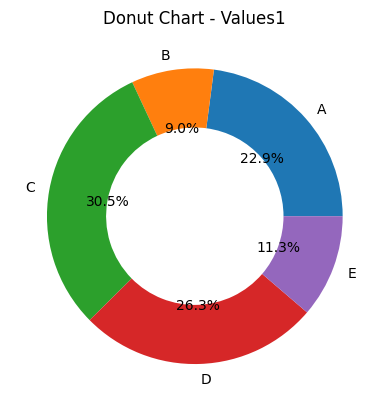

In [3]:
plt.figure()
wedges, texts, autotexts = plt.pie(df["Values1"], labels=df["Category"], autopct="%1.1f%%", wedgeprops=dict(width=0.4))
plt.title("Donut Chart - Values1")
plt.show()


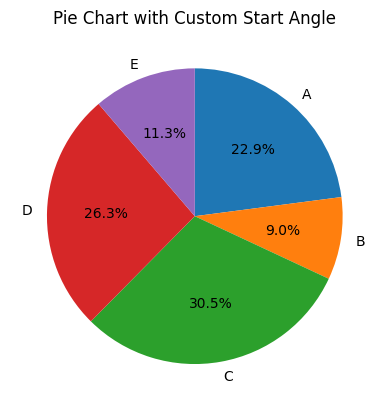

In [4]:
plt.figure()
plt.pie(df["Values1"], labels=df["Category"], autopct="%1.1f%%", startangle=90, counterclock=False)
plt.title("Pie Chart with Custom Start Angle")
plt.show()


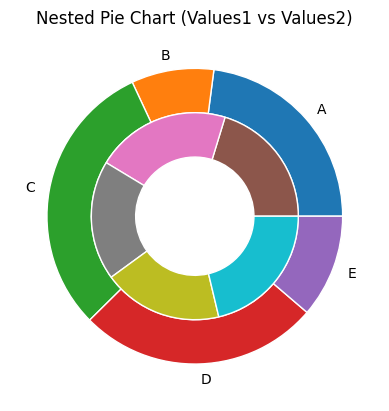

In [5]:
fig, ax = plt.subplots()
size = 0.3

ax.pie(df["Values1"], radius=1, wedgeprops=dict(width=size, edgecolor="w"), labels=df["Category"])
ax.pie(df["Values2"], radius=1-size, wedgeprops=dict(width=size, edgecolor="w"))
ax.set(aspect="equal", title="Nested Pie Chart (Values1 vs Values2)")
plt.show()


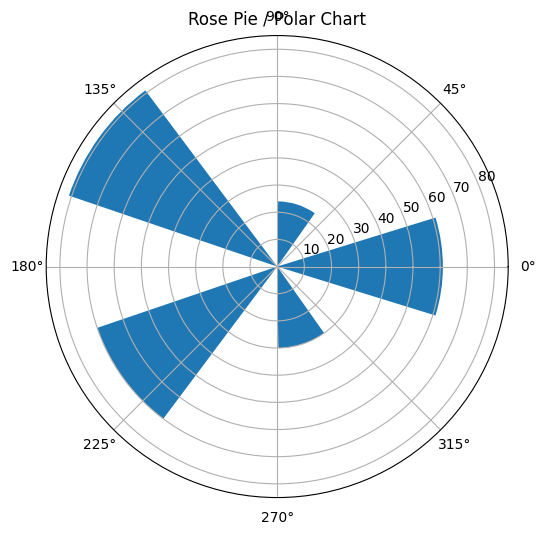

In [6]:
theta = np.linspace(0, 2*np.pi, len(df), endpoint=False)
radii = df["Values1"]
plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=0.6, bottom=0.0)
ax.set_title("Rose Pie / Polar Chart", va="bottom")
plt.show()


In [7]:
from mpl_toolkits.mplot3d import Axes3D

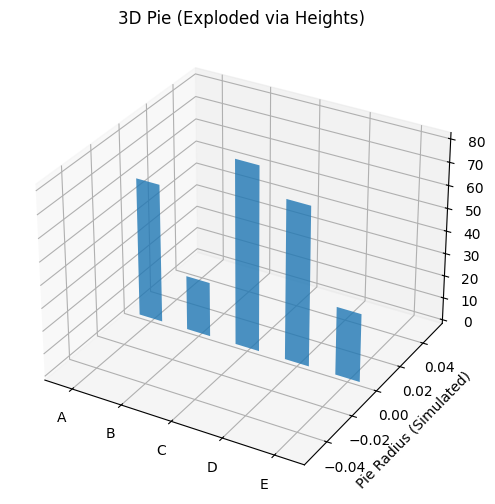

In [8]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")

# Values & categories
values = df["Values1"]
categories = df["Category"]

# Angles
theta = np.linspace(0, 2*np.pi, len(values)+1)
r = np.ones(len(values))

# Heights proportional to values
ax.bar(theta[:-1], values, zs=0, zdir='y', width=0.6, alpha=0.8)

ax.set_xticks(theta[:-1])
ax.set_xticklabels(categories)
ax.set_ylabel("Pie Radius (Simulated)")
ax.set_title("3D Pie (Exploded via Heights)")
plt.show()


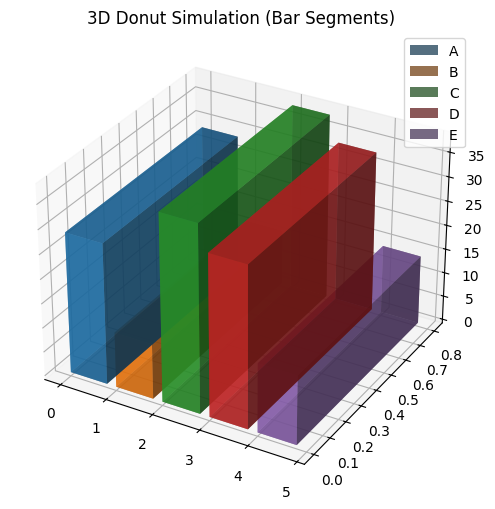

In [9]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")

# Pie slice angles
theta = np.linspace(0, 2*np.pi, len(df)+1)
radii = df["Values1"] / sum(df["Values1"]) * 2*np.pi

# Draw cylinder slices
for i, (cat, val) in enumerate(zip(df["Category"], radii)):
    ax.bar3d(x=i, y=0, z=0, dx=0.8, dy=0.8, dz=val*20, alpha=0.7, label=cat)

ax.set_title("3D Donut Simulation (Bar Segments)")
ax.legend()
plt.show()


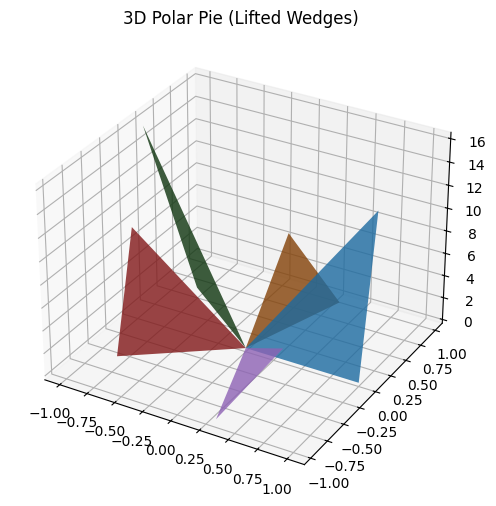

In [10]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")

# Angles and values
angles = np.linspace(0, 2*np.pi, len(df), endpoint=False)
values = df["Values1"]

for i, (ang, val) in enumerate(zip(angles, values)):
    xs = [0, np.cos(ang), np.cos(ang+0.5)]
    ys = [0, np.sin(ang), np.sin(ang+0.5)]
    zs = [0, 0, val/5]
    ax.plot_trisurf(xs, ys, zs, alpha=0.8)

ax.set_title("3D Polar Pie (Lifted Wedges)")
plt.show()


In [11]:
# If not already installed
!pip install plotly

import plotly.graph_objects as go
import numpy as np
import pandas as pd

# Sample dataset
np.random.seed(42)
df = pd.DataFrame({
    "Category": ["A", "B", "C", "D", "E"],
    "Values1": np.random.randint(10, 100, 5),
    "Values2": np.random.randint(20, 120, 5)
})
df


,Category,Values1,Values2
0,A,61,102
1,B,24,106
2,C,81,94
3,D,70,94
4,E,30,107


In [12]:
fig = go.Figure(data=[
    go.Pie(labels=df["Category"], values=df["Values1"], hole=0)
])
fig.update_layout(title_text="Interactive Pie Chart - Values1")
fig.show()


In [13]:
fig = go.Figure(data=[
    go.Pie(labels=df["Category"], values=df["Values1"], hole=0.5)
])
fig.update_layout(title_text="Interactive Donut Chart - Values1")
fig.show()


In [14]:
fig = go.Figure(go.Sunburst(
    labels=np.concatenate([df["Category"], df["Category"] + " - Sub"]),
    parents=[""] * len(df) + list(df["Category"]),
    values=np.concatenate([df["Values1"], df["Values2"]])
))
fig.update_layout(title_text="Interactive Nested Pie (Sunburst)")
fig.show()


In [15]:
theta = np.linspace(0, 360, len(df), endpoint=False)
fig = go.Figure(go.Barpolar(
    r=df["Values1"],
    theta=theta,
    text=df["Category"],
    marker=dict(line=dict(color="black", width=2))
))
fig.update_layout(
    polar=dict(radialaxis=dict(showticklabels=True, ticks='')),
    title="Interactive Polar Pie (Rose Chart)"
)
fig.show()


In [16]:
fig = go.Figure()

angles = np.linspace(0, 2*np.pi, len(df)+1)
r = 1

for i, val in enumerate(df["Values1"]):
    theta1, theta2 = angles[i], angles[i+1]
    x = [0, r*np.cos(theta1), r*np.cos(theta2)]
    y = [0, r*np.sin(theta1), r*np.sin(theta2)]
    z = [0, 0, val/20]  # height proportional to value

    fig.add_trace(go.Mesh3d(
        x=x, y=y, z=z,
        color="rgba(0,150,250,0.6)",
        opacity=0.7,
        name=df["Category"][i]
    ))

fig.update_layout(scene=dict(aspectmode="data"), title="Interactive 3D Pie Simulation")
fig.show()
